In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Spotify Top 50 Tracks of 2020 dataset

In [14]:
# import os
# os.getcwd()

df = pd.read_csv('/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M1S2 Spotify assigment/spotifytoptracks.csv',index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


# Data cleaning

## Check if any missing values appears in dataset

<i>H0: If the original dataset length differs from mask dataset with dropped Null values, then missing values appears in dataset </i>

In [3]:
if len(df) == len(df.dropna()):
    print('There are no missing values in dataset')
else:
    print('Missing values appears in dataset')

There are no missing values in dataset


<i>H0: Does original dataset mask with applied function `.isnull()` columns has Null values?</i>

In [4]:
col = list(df.columns)
df_check_null = df.isnull()

check_if_null = {}

for i in col:
    check_if_null.update({f'{i}': df_check_null[f'{i}'].max()})
    
print('Is there any missing values?')
check_if_null

Is there any missing values?


{'artist': False,
 'album': False,
 'track_name': False,
 'track_id': False,
 'energy': False,
 'danceability': False,
 'key': False,
 'loudness': False,
 'acousticness': False,
 'speechiness': False,
 'instrumentalness': False,
 'liveness': False,
 'valence': False,
 'tempo': False,
 'duration_ms': False,
 'genre': False}

## Is there any dublicate values and features?

In [13]:
# Is index keys unique?
df.index.is_unique

True

In [7]:
# Is columns unique?
df.columns.is_unique

True

<i>H0: Dataset contains duplicate feature columns </i>

In [279]:
if df.shape[1] == len(df.columns):
    print('No duplicate columns were found')
else:
    print('Duplicate columsn were found')

No duplicate columns were found


<i>H0: Dataset contains duplicate tracks </i>

In [280]:
track_duplicates = df.groupby('track_id').agg(Occur=('track_id','count'))

if len(track_duplicates[track_duplicates.Occur >= 2]) > 0:
    print('Duplicate track entires were found')
else:
    print('There was no duplicate tracks')

track_duplicates.sort_values(by='Occur',ascending = False).head(5)

There was no duplicate tracks


,Occur
track_id,
017PF4Q3l4DBUiWoXk4OWT,1
4Oun2ylbjFKMPTiaSbbCih,1
3GZoWLVbmxcBys6g0DLFLf,1
3H7ihDc1dqLriiWXwsc2po,1
3PfIrDoz19wz7qK7tYeu62,1


<i>H0: Dataset contains duplicate keys </i>

In [281]:
key_duplicates = df.groupby('key').agg(Occur=('track_id','count'))

if len(key_duplicates[key_duplicates.Occur >= 2]) > 0:
    print('Duplicate keys entires were found:', key_duplicates[key_duplicates.Occur >= 2].count())
else:
    print('There was no duplicate keys')

key_duplicates.sort_values(by='Occur',ascending = False).head(11)

Duplicate keys entires were found: Occur    10
dtype: int64


,Occur
key,
0,6
6,6
7,6
8,6
1,5
11,5
2,4
9,4
10,4


## Outliers detection

In [282]:
round(df.describe(),3)

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,0.609,0.717,5.720,-6.226,0.256,0.124,0.016,0.197,0.556,119.690,199955.360
std,0.154,0.125,3.709,2.350,0.265,0.117,0.094,0.177,0.216,25.415,33996.122
min,0.225,0.351,0.000,-14.454,0.001,0.029,0.000,0.057,0.060,75.801,140526.000
25%,0.494,0.673,2.000,-7.552,0.053,0.048,0.000,0.094,0.434,99.557,175845.500
50%,0.597,0.746,6.500,-5.992,0.188,0.070,0.000,0.111,0.560,116.969,197853.500
75%,0.730,0.794,8.750,-4.286,0.299,0.156,0.000,0.271,0.726,132.317,215064.000
max,0.855,0.935,11.000,-3.280,0.934,0.487,0.657,0.792,0.925,180.067,312820.000


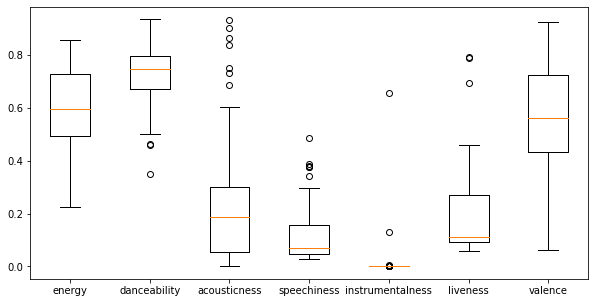

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
 
bp = ax.boxplot(df[['energy','danceability', 'acousticness', 'speechiness', 
                    'instrumentalness', 'liveness', 'valence']],
        labels = ['energy','danceability', 'acousticness', 'speechiness','instrumentalness', 'liveness', 'valence'])

plt.show()

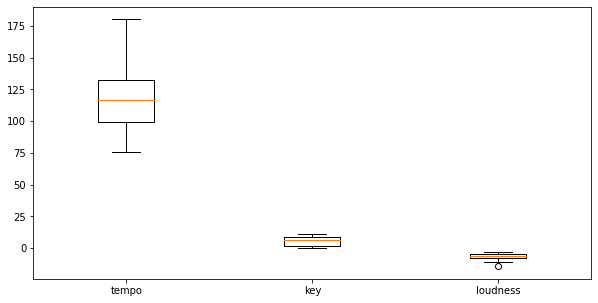

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
 
bp = ax.boxplot(df[['tempo','key', 'loudness']],
        labels = ['tempo','key', 'loudness'])

plt.show()

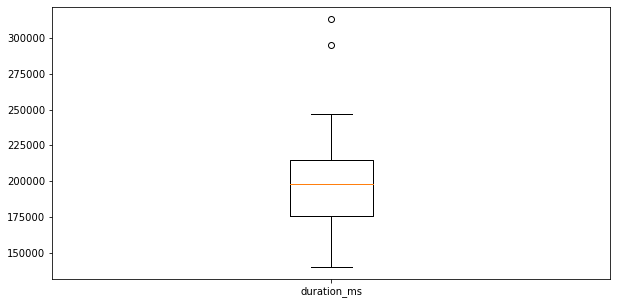

In [285]:
fig, ax = plt.subplots(figsize=(10, 5))
 
bp = ax.boxplot(df[['duration_ms']],
        labels = ['duration_ms'])

plt.show()

# Exploratory data analysis

In [286]:
print('How many observations are there in this dataset?')
df.shape

How many observations are there in this dataset?


(50, 16)

In [287]:
print('How many features this dataset has?')
df.info()

How many features this dataset has?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64

In [312]:
print(df.dtypes)
print('\nWhich of the features are categorical?')
categorical_feat = ['artist','album', 'track_name', 'track_id', 'genre']
print('Categorical:', categorical_feat)

print('\nWhich of the features are numeric?')
numeric_feat = ['energy','danceability','loudness','acousticness','speechiness',
                'instrumentalness','liveness','valence','tempo','duration_ms']
print('Numeric:', numeric_feat)

PlaceInTop            int64
artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

Which of the features are categorical?
Categorical: ['artist', 'album', 'track_name', 'track_id', 'genre']

Which of the features are numeric?
Numeric: ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [289]:
print('Are there any artists that have more than 1 popular track? If yes, which and how many?\n')

artists = df.groupby('artist').agg(Tracks=('track_id','count'))
artists_multiple_tracks = artists[artists.Tracks > 1]

print('There are', len(artists_multiple_tracks), 'artists with 1+ popular tracks')
artists_multiple_tracks

Are there any artists that have more than 1 popular track? If yes, which and how many?

There are 7 artists with 1+ popular tracks


,Tracks
artist,
Billie Eilish,3
Dua Lipa,3
Harry Styles,2
Justin Bieber,2
Lewis Capaldi,2
Post Malone,2
Travis Scott,3


In [290]:
print('Who was the most popular artist?')
df = df.reset_index()
df = df.rename(columns = {'index': 'PlaceInTop'})
df.head(2)

Who was the most popular artist?


,PlaceInTop,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie


In [291]:
print('Most popular artist in the 1st TOP 50 pozition is:')
df.loc[0]['artist']

Most popular artist in the 1st TOP 50 pozition is:


'The Weeknd'

In [292]:
df['ArtistRank'] = df['PlaceInTop'].rank(method='max')
df.sort_values(by='ArtistRank', ascending = True).loc[0]['artist']

'The Weeknd'

In [293]:
print('How many artists in total have their songs in the top 50?')
print('There are',len(df.artist.unique()), 'unique artists in Top 50')

How many artists in total have their songs in the top 50?
There are 40 unique artists in Top 50


In [294]:
print('Are there any albums that have more than 1 popular track? If yes, which and how many?')
albums_tracks = df.groupby('album').agg(Tracks=('track_id','count'))
albums_tracks_1plus = albums_tracks[albums_tracks.Tracks > 1]
print('There are', len(albums_tracks), 'albums with 1 or more popular tracks')
albums_tracks_1plus

Are there any albums that have more than 1 popular track? If yes, which and how many?
There are 45 albums with 1 or more popular tracks


,Tracks
album,
Changes,2
Fine Line,2
Future Nostalgia,3
Hollywood's Bleeding,2


In [295]:
print('How many albums in total have their songs in the top 50?')
len(df.album.unique())

How many albums in total have their songs in the top 50?


45

In [296]:
print('Which tracks have a danceability score above 0.7?')
list(df[df.danceability > 0.7].track_name.unique())

Which tracks have a danceability score above 0.7?


['Dance Monkey',
 'The Box',
 'Roses - Imanbek Remix',
 "Don't Start Now",
 'ROCKSTAR (feat. Roddy Ricch)',
 'death bed (coffee for your head)',
 'Falling',
 'Tusa',
 'Blueberry Faygo',
 'Intentions (feat. Quavo)',
 'Toosie Slide',
 'Say So',
 'Memories',
 'Life Is Good (feat. Drake)',
 'Savage Love (Laxed - Siren Beat)',
 'Breaking Me',
 'everything i wanted',
 'Señorita',
 'bad guy',
 'WAP (feat. Megan Thee Stallion)',
 'Sunday Best',
 'Godzilla (feat. Juice WRLD)',
 'Break My Heart',
 'Dynamite',
 'Supalonely (feat. Gus Dapperton)',
 'Sunflower - Spider-Man: Into the Spider-Verse',
 'Hawái',
 'Ride It',
 'goosebumps',
 'RITMO (Bad Boys For Life)',
 'THE SCOTTS',
 'SICKO MODE']

In [297]:
print('Which tracks have a danceability score below 0.4?')
list(df[df.danceability < 0.4].track_name.unique())

Which tracks have a danceability score below 0.4?


['lovely (with Khalid)']

In [298]:
print('Which tracks have their loudness above -5?')
df[df.loudness > -5][['track_name','loudness']]
#list(df[df.loudness > -5].track_name.unique())

Which tracks have their loudness above -5?


,track_name,loudness
4,Don't Start Now,-4.521
6,Watermelon Sugar,-4.209
10,Tusa,-3.280
12,Circles,-3.497
16,Before You Go,-4.858
17,Say So,-4.577
21,Adore You,-3.675
23,Mood (feat. iann dior),-3.558
31,Break My Heart,-3.434
32,Dynamite,-4.410


In [299]:
print('Which tracks have their loudness below -8?')
df[df.loudness < -8][['track_name','loudness']]

Which tracks have their loudness below -8?


,track_name,loudness
7,death bed (coffee for your head),-8.765
8,Falling,-8.756
15,Toosie Slide,-8.820
20,Savage Love (Laxed - Siren Beat),-8.520
24,everything i wanted,-14.454
26,bad guy,-10.965
36,HIGHEST IN THE ROOM,-8.764
44,lovely (with Khalid),-10.109
47,If the World Was Ending - feat. Julia Michaels,-10.086


In [300]:
print('Which track is the longest?')
df[df.duration_ms == df.duration_ms.max()][['track_name','duration_ms']]

Which track is the longest?


,track_name,duration_ms
49,SICKO MODE,312820


In [301]:
print('Which track is the shortest?')
df[df.duration_ms == df.duration_ms.min()][['track_name','duration_ms']]

Which track is the shortest?


,track_name,duration_ms
23,Mood (feat. iann dior),140526


In [302]:
print('Which genre is the most popular?')
genre_popularity = df.groupby('genre').agg(Occur=('track_id','count'))
genre_popularity[genre_popularity.Occur == genre_popularity.Occur.max()]

Which genre is the most popular?


,Occur
genre,
Pop,14


In [303]:
print('Which genres have just one song on the top 50?')
genre_popularity[genre_popularity.Occur == 1]

Which genres have just one song on the top 50?


,Occur
genre,
Alternative/reggaeton/experimental,1
Chamber pop,1
Dance-pop/Disco,1
Disco-pop,1
Dreampop/Hip-Hop/R&B,1
Hip-Hop/Trap,1
Nu-disco,1
Pop rap,1
Pop/Soft Rock,1


In [304]:
print('How many genres in total are represented in the top 50?')
len(df.genre.unique())

How many genres in total are represented in the top 50?


16

Which features are strongly positively correlated?
Which features are strongly negatively correlated?


<AxesSubplot:>

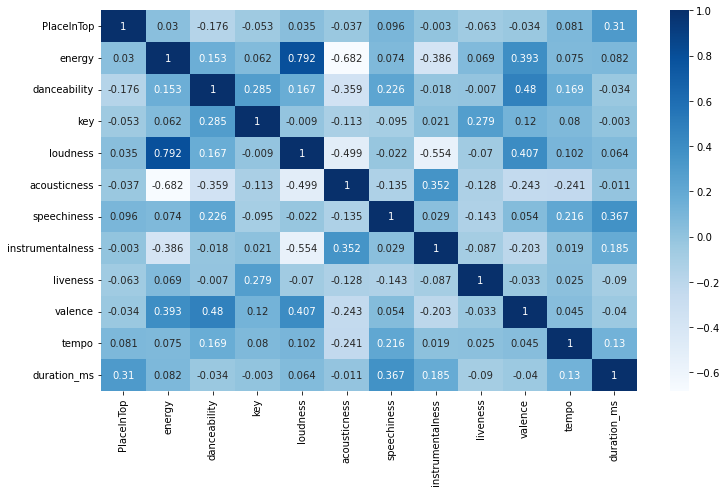

In [307]:
print('Which features are strongly positively correlated?')
print('Which features are strongly negatively correlated?')

df = df.drop(columns = ['ArtistRank'])

corr_matrix = round(df.corr(),3)
fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(round(df.corr(),3),annot=True,cmap='Blues', fmt='g')

- We found that <b>energy</b> and <b>loudness</b> are strongly positively correlated.
- While <b>energy</b> and <b>acousticness</b>, <b>loudness</b> and <b>instrumentalness</b> are strongly negatively correlated

In [256]:
print('Which features are not correlated?')
(corr_matrix < 0.4) & (corr_matrix > -0.4)

Which features are not correlated?


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,False,True,True,False,False,True,True,True,True,True,True
danceability,True,False,True,True,True,True,True,True,False,True,True
key,True,True,False,True,True,True,True,True,True,True,True
loudness,False,True,True,False,False,True,False,True,False,True,True
acousticness,False,True,True,False,False,True,True,True,True,True,True
speechiness,True,True,True,True,True,False,True,True,True,True,True
instrumentalness,True,True,True,False,True,True,False,True,True,True,True
liveness,True,True,True,True,True,True,True,False,True,True,True
valence,True,False,True,False,True,True,True,True,False,True,True
tempo,True,True,True,True,True,True,True,True,True,False,True


In [261]:
print('How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?')
df[df.genre.isin(['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie'])].groupby('genre')['danceability'].describe()#.unstack()



How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,0.661750,0.211107,0.459,0.49050,0.663,0.83425,0.862
Dance/Electronic,5.0,0.755000,0.094744,0.647,0.67400,0.785,0.78900,0.880
Hip-Hop/Rap,13.0,0.765538,0.085470,0.598,0.72600,0.774,0.83000,0.896
Pop,14.0,0.677571,0.109853,0.464,0.61575,0.690,0.76275,0.806


- Pop has similarly as much popular songs as Hip-Hop/Rap in top 50.
- Danceability average is quite similar between these genres, but highers danceability mean values has Hip-Hop/Rap and Dance/Electronic genres.
- Danceability value varies the most at Alternative/Indie genre.
- Lowest danceability value appears on Alternative/Indie and Pop genre based on min and 25th percentile values. 
- Median daceability value is similar between Alternative/Indie  and Hip-Hop/Rap, when between Pop and Dance/Electronic
- The highest danceability values are on Alternative/Indie and  Hip-Hop/Rap genres by 75th percentele.

How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


<AxesSubplot:xlabel='genre', ylabel='loudness'>

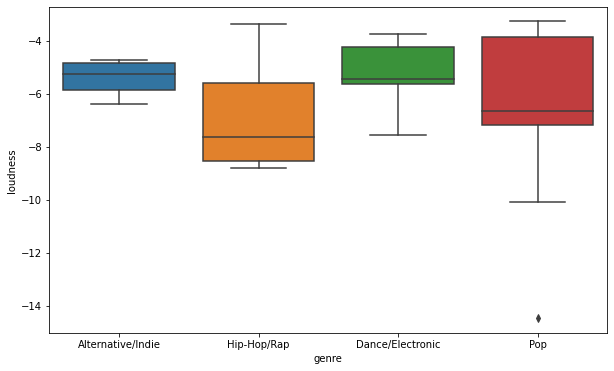

In [272]:
print('How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?')
df_compare = df[df.genre.isin(['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie'])].reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='genre', y='loudness', data=df_compare)


- The highest variability of loudness has Pop genre (std = 3.01).
- Based on median Alternative/Indie and Dance/Electronic are the loudest genres among these groups.

In [273]:
df[df.genre.isin(['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie'])].groupby('genre')['loudness'].describe()#.unstack()


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,-5.421000,0.774502,-6.401,-5.85950,-5.2685,-4.83000,-4.746
Dance/Electronic,5.0,-5.338000,1.479047,-7.567,-5.65200,-5.4570,-4.25800,-3.756
Hip-Hop/Rap,13.0,-6.917846,1.891808,-8.820,-8.52000,-7.6480,-5.61600,-3.370
Pop,14.0,-6.460357,3.014281,-14.454,-7.17875,-6.6445,-3.87525,-3.280


How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


<AxesSubplot:xlabel='genre', ylabel='acousticness'>

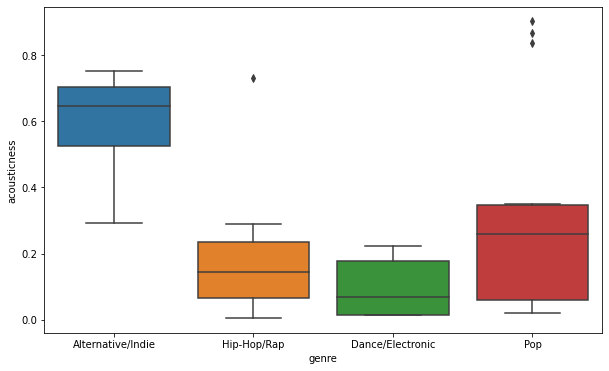

In [275]:
print('How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='genre', y='acousticness', data=df_compare)


- The most acousticness genre is Alternative/Indie.
- Pop could have more acoustic songs then Dance/Electronic and Hip-Hop/Rap compared bu 75th percentile values.

In [276]:
df[df.genre.isin(['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie'])].groupby('genre')['acousticness'].describe()#.unstack()


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Alternative/Indie,4.0,0.583500,0.204086,0.29100,0.52575,0.6460,0.70375,0.751
Dance/Electronic,5.0,0.099440,0.095828,0.01370,0.01490,0.0686,0.17700,0.223
Hip-Hop/Rap,13.0,0.188741,0.186396,0.00513,0.06700,0.1450,0.23400,0.731
Pop,14.0,0.323843,0.318142,0.02100,0.05990,0.2590,0.34800,0.902


# Suggestions on how analysis can be improved

- Check if there is any linear relations between place in the top and features

Text(0, 0.5, 'Y-energy')

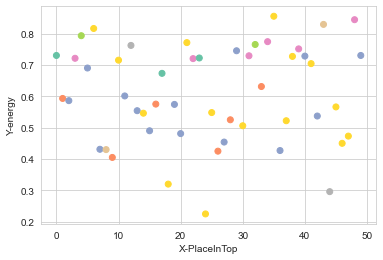

In [324]:
import matplotlib.pyplot as plt

# Get Unique genre
color_labels = df['genre'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", len(color_labels))

# Map genres to the colors
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(df['PlaceInTop'], df['energy'], c=df['genre'].map(color_map))
plt.xlabel("X-PlaceInTop")
plt.ylabel("Y-energy")

Text(0, 0.5, 'Y-danceability')

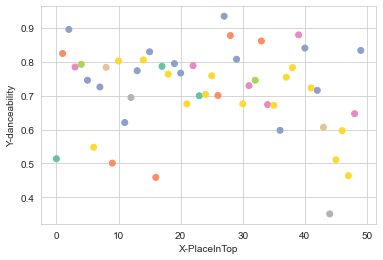

In [325]:
plt.scatter(df['PlaceInTop'], df['danceability'], c=df['genre'].map(color_map))
plt.xlabel("X-PlaceInTop")
plt.ylabel("Y-danceability")

Text(0, 0.5, 'Y-loudness')

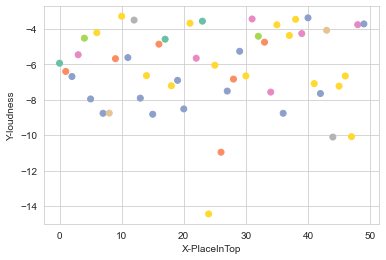

In [326]:
plt.scatter(df['PlaceInTop'], df['loudness'], c=df['genre'].map(color_map))
plt.xlabel("X-PlaceInTop")
plt.ylabel("Y-loudness")

Text(0, 0.5, 'Y-liveness')

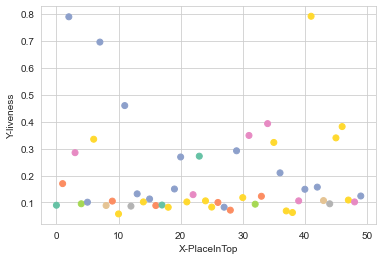

In [328]:
plt.scatter(df['PlaceInTop'], df['liveness'], c=df['genre'].map(color_map))
plt.xlabel("X-PlaceInTop")
plt.ylabel("Y-liveness")

Text(0, 0.5, 'Y-tempo')

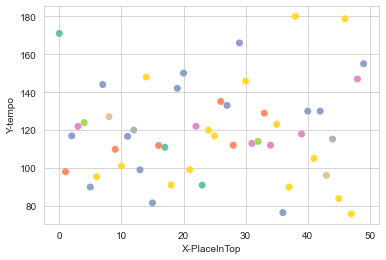

In [329]:
plt.scatter(df['PlaceInTop'], df['tempo'], c=df['genre'].map(color_map))
plt.xlabel("X-PlaceInTop")
plt.ylabel("Y-tempo")